# 4. Statistics

## 4.5 Regularization

### 4.5.3 Example: weight decay

> Plot ridge regression applied to  1d polynomial problem
> Based on https://github.com/probml/pmtk3/blob/master/demos/polyfitRidgeLasso.m

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
rng = np.random.default_rng()

N = 21
X_train = np.linspace(0, 20, N)
X_test = np.arange(0, 20, 0.1)

sigma = 2
w = np.array([-1.5, 1 / 9.0])
fn = lambda x: w[0] * x + w[1] * np.square(x)
y_train = fn(X_train) + rng.normal(scale=sigma, size=X_train.shape)
y_test = fn(X_test) + rng.normal(scale=sigma, size=X_test.shape)

# Reshape for fitting
X_train = X_train.reshape((-1, 1))
X_test = X_test.reshape((-1, 1))

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21, 1), (21,), (200, 1), (200,))

In [32]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error

def ridge_estimation(X_train, y_train, X_test, y_test, degree=1, alpha=1):
    # Rescaling data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Generate polynomial features
    poly_features = PolynomialFeatures(degree, include_bias=False)
    X_train = poly_features.fit_transform(X_train)
    X_test = poly_features.transform(X_test)

    # clf = LinearRegression() if alpha < 1e-5 else Ridge(alpha=alpha)
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    mse_train = mean_squared_error(y_train_pred, y_train)
    mse_test = mean_squared_error(y_test_pred, y_test)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
    return (y_train_pred, mse_train, score_train), \
           (y_test_pred, mse_test, score_test), \
           (clf.intercept_, clf.coef_[0])

pred_train, pred_test, theta = ridge_estimation(
    X_train, y_train, X_test, y_test, degree=1, alpha=1
)
pred_train[1:], pred_test[1:], theta # (mse, r2_score) and (w0, w1)

((28.14586391052963, 0.35192718423096103),
 (16.588476277407754, 0.4646461059825604),
 (0.42179526821773267, 5.752353632263992))

#### Figure 4.5: (a-c) Ridge regression applied to a degree 14 polynomial fit to 21 datasets.

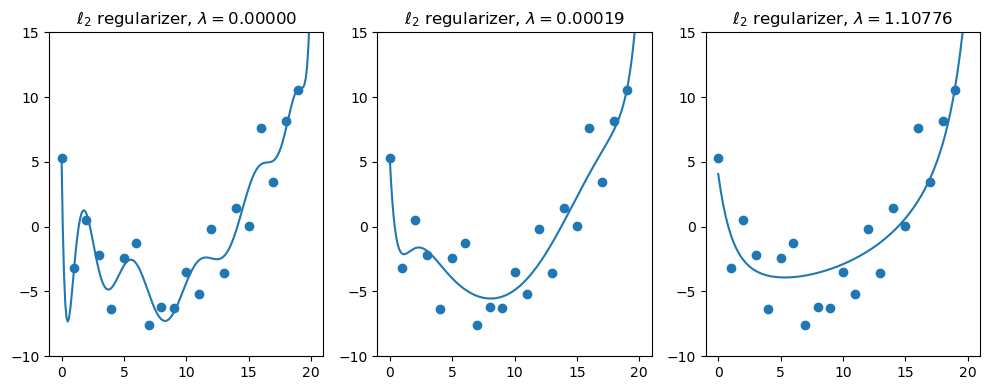

In [42]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4), tight_layout=True)

# Plot fitted functions
for alpha, ax in zip(np.logspace(-10, 1.3, 10)[[0, 5, 8]], axes):
    ax.scatter(X_train, y_train)
    _, pred_test, _ = ridge_estimation(
        X_train, y_train, X_test, y_test, degree=14, alpha=alpha
    )
    ax.plot(X_test, pred_test[0])
    ax.set_ylim((-10, 15))
    ax.set_title(f'$\ell_2$ regularizer, $\lambda = ${alpha:.5f}')

In [34]:
mse = []
for alpha in np.logspace(-10, 1.3, 10):
    pred_train, pred_test, theta = ridge_estimation(
        X_train, y_train, X_test, y_test, degree=14, alpha=alpha
    )
    mse.append((alpha, pred_train[1], pred_test[1]))
mse = np.asarray(mse)
mse

array([[1.00000000e-10, 2.40497032e+00, 6.31399418e+00],
       [1.80117353e-09, 2.40897593e+00, 6.58988077e+00],
       [3.24422608e-08, 2.46324875e+00, 7.05910562e+00],
       [5.84341413e-07, 2.73812833e+00, 5.89423917e+00],
       [1.05250029e-05, 3.46690131e+00, 4.87928781e+00],
       [1.89573565e-04, 3.77069957e+00, 4.88227495e+00],
       [3.41454887e-03, 3.85929069e+00, 4.86012412e+00],
       [6.15019504e-02, 4.33647550e+00, 5.18448675e+00],
       [1.10775685e+00, 5.78920043e+00, 6.76068433e+00],
       [1.99526231e+01, 1.89563506e+01, 1.58719341e+01]])

#### Figure 4.5: (d) MSE vs. strength of regularizer. The degree of regularization increases from left to right, so model complexity decreases from left to right.

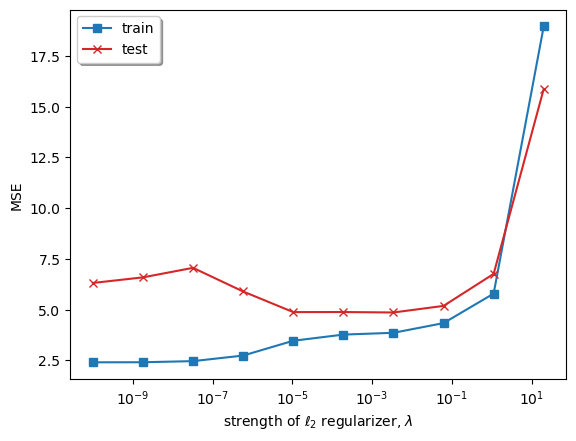

In [39]:
# Plot MSE vs degree
_, ax = plt.subplots()
ax.plot(mse[:, 0], mse[:, 1], color='tab:blue', marker='s', label='train')
ax.plot(mse[:, 0], mse[:, 2], color='tab:red', marker='x', label='test')
ax.set_xscale('log')
ax.set_xlabel('strength of $\ell_2$ regularizer, $\lambda$')
ax.set_ylabel('MSE')
ax.legend(loc='upper left', shadow=True);